# Question 1

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import filters
from scipy import spatial

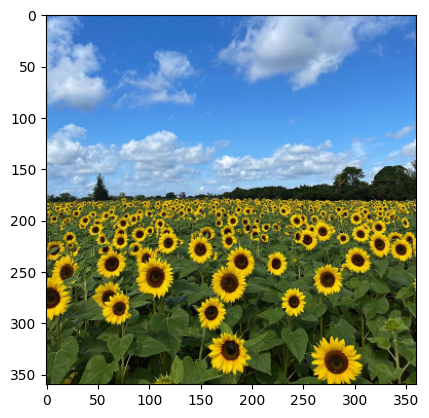

In [3]:
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im)


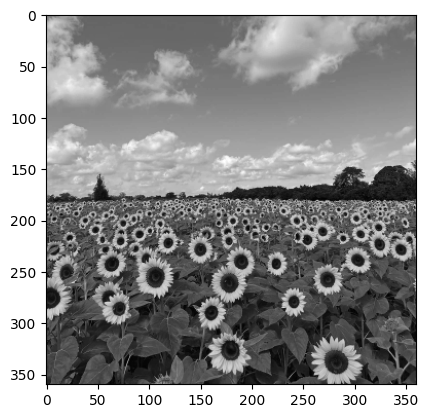

In [4]:
im1 = cv.cvtColor(im, cv.COLOR_RGB2GRAY)
plt.imshow(im1, cmap='gray')

The rule of thumb for Gaussian filter design is to choose the filter size to be about 3 times the standard deviation (sigma value) in each direction, for a total filter size of approximately 6sigma rounded to an odd integer value. The tails of a Gaussian function have amplitude that is effectively zero beyond three standard deviations from the mean, so keeping these filter coefficients does little to effect the result of filtering. It is also desired to ensure that a filter's edges go to zero on all sides. Additionally, truncating at 3sigma prevents the Gaussian filter from becoming too large, which makes the filtering process more computationally efficient.

In [5]:
def LoG(sigma):
    #window size
    n = np.ceil(sigma*6)
    y,x = np.ogrid[-n//2:n//2+1,-n//2:n//2+1]
    y_filter = np.exp(-(y*y/(2.*sigma*sigma)))
    x_filter = np.exp(-(x*x/(2.*sigma*sigma)))
    final_filter =  (-(2*sigma**2) + (x*x + y*y) ) *  (x_filter*y_filter) * (1/(2*np.pi*sigma**4))
    return final_filter

In [6]:
sigma = 1.0

In [7]:
def LoG_convolve(img):
        sigma_1 = sigma #sigma
        filter_log = LoG(sigma_1) #filter generation
        image = cv.filter2D(img,-1,filter_log) # convolving image
        #image = np.pad(image,((1,1),(1,1)),'constant') #padding
        #image = np.square(image) # squaring the response
        #plt.imshow(image, cmap='gray')
        #plt.imshow(filter_log,cmap='gray')
        return image
log_image_np = LoG_convolve(im1)
#print(log_image_np.shape)

Max value for sigma 1: 90


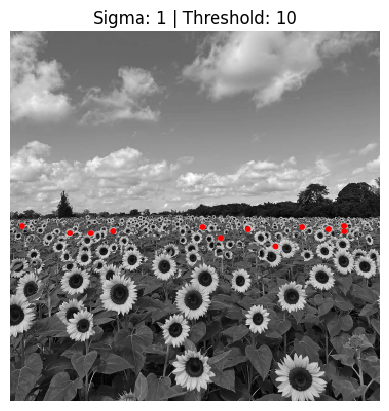

Max value for sigma 2: 96


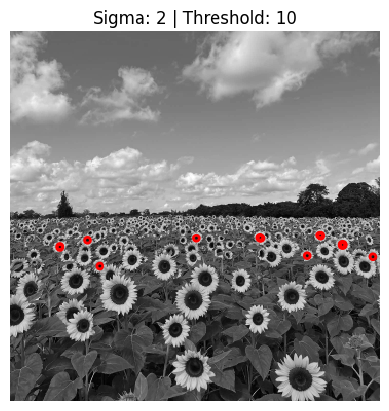

Max value for sigma 3: 96


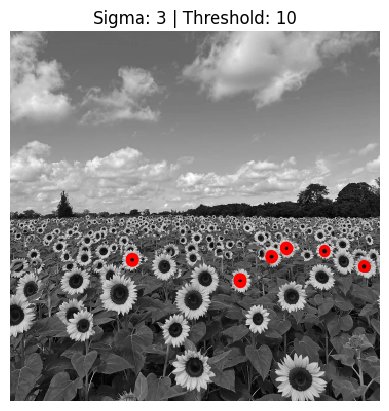

Max value for sigma 4: 95


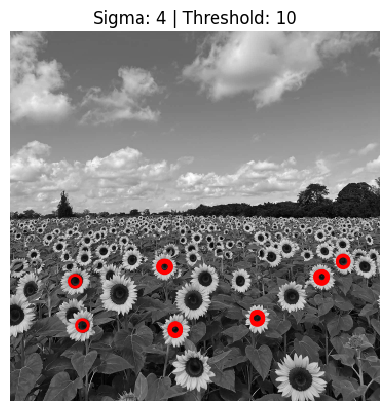

Max value for sigma 5: 85


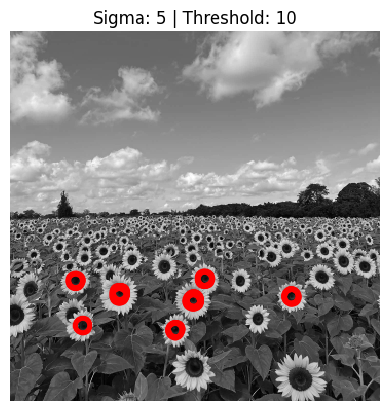

Max value for sigma 6: 90


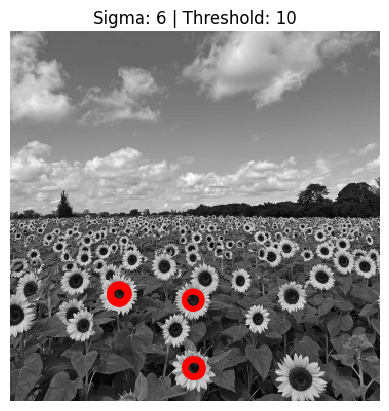

Max value for sigma 7: 84


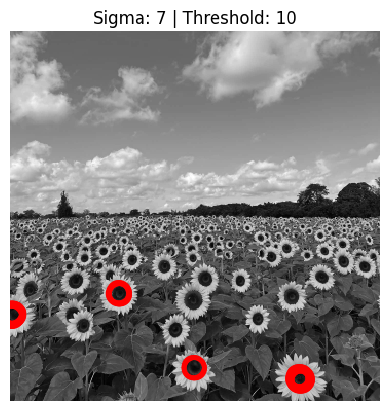

Max value for sigma 8: 82


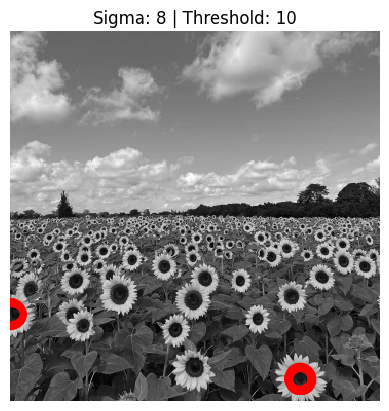

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming log_image_np is your image array and im1 is the original image to display
# Step 1: Set up the sigma range and threshold
sigma_range = range(1, 9)  # Sigma values from 1 to 6
Threshold = 10  # Define the threshold (adjust as necessary)

for sigma in sigma_range:
    log_image_np = LoG_convolve(im1)
    # Step 2: Find the maximum value in the image
    max_value = np.max(log_image_np)
    print(f"Max value for sigma {sigma}: {max_value}")

    # Step 3: Define the lower bound for the threshold
    lower_bound = max_value - Threshold

    # Step 4: Find all coordinates where the image value is within the threshold
    max_coords = np.where((log_image_np >= lower_bound) & (log_image_np <= max_value))
    #print(f"Coordinates for sigma {sigma}: {max_coords}")

    # Convert them into a list of (row, col) coordinates
    max_coords_list = list(zip(max_coords[0], max_coords[1]))

    # Step 5: Draw circles at each selected coordinate
    radius = sigma * 1.414  # Set the radius for the circles based on sigma
    color = 'red'  # Red color for the circles
    thickness = 2  # Thickness of the circle boundary

    # Create a figure and axis for plotting
    fig, ax = plt.subplots()
    ax.imshow(im1, interpolation='nearest', cmap="gray")

    # Loop through each coordinate and draw a circle
    for coord in max_coords_list:
        # Unpacking the coordinate directly
        y, x = coord  # (row, col) to (col, row)
        circle = plt.Circle((x, y), radius, color=color, linewidth=thickness, fill=False)
        ax.add_patch(circle)

    # Display the plot for the current sigma
    plt.axis('off')  # Hide the axis
    plt.title(f'Sigma: {sigma} | Threshold: {Threshold}')  # Add a title for clarity
    plt.show()



Max value for sigma 1: 90
Max value for sigma 2: 96
Max value for sigma 3: 96
Max value for sigma 4: 95
Max value for sigma 5: 85
Max value for sigma 6: 90
Max value for sigma 7: 84
Max value for sigma 8: 82


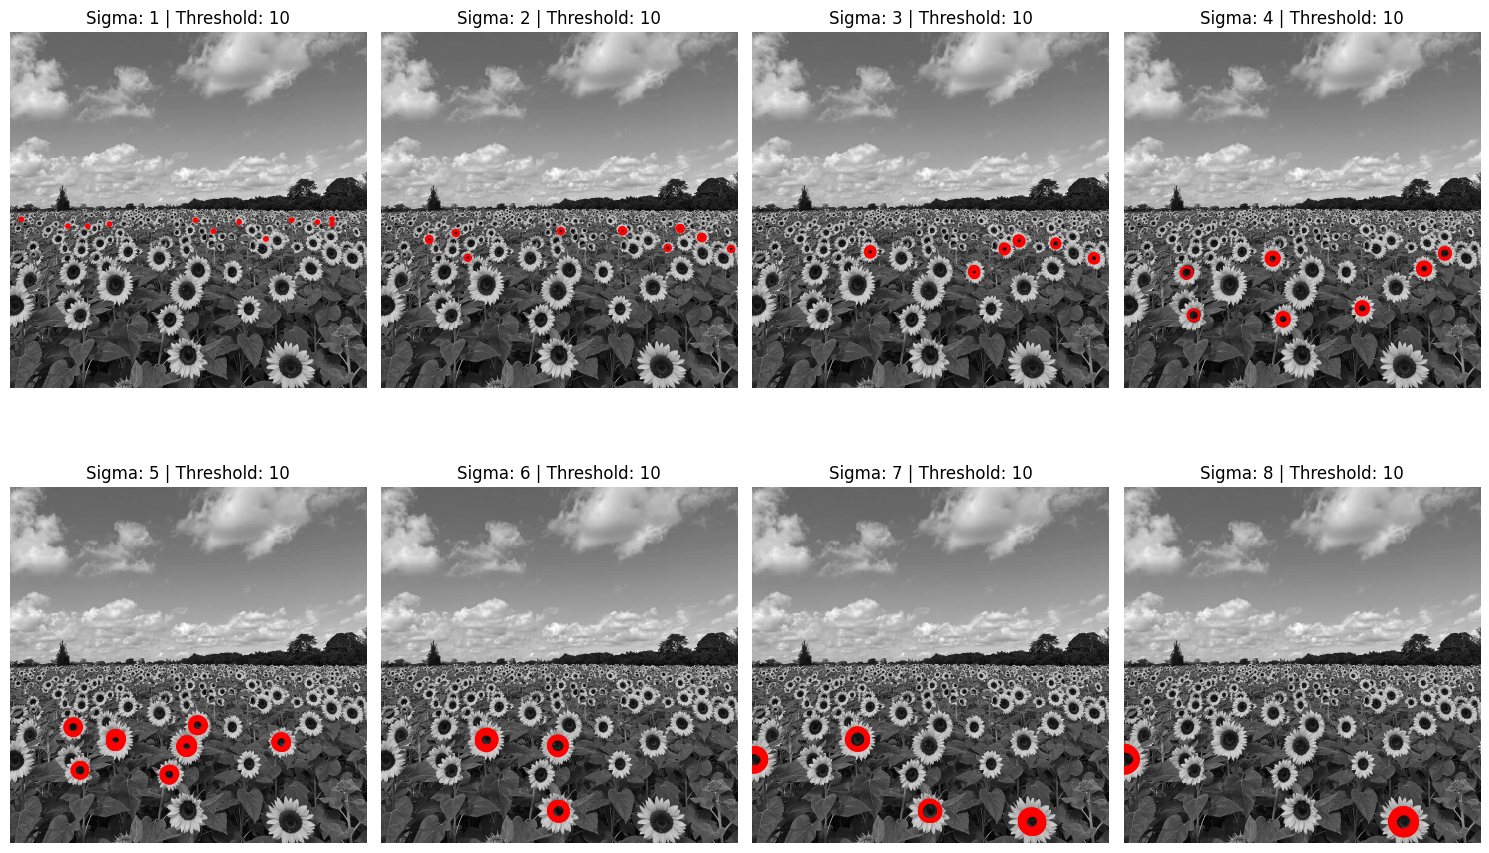

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming log_image_np is your image array and im1 is the original image to display
# Step 1: Set up the sigma range and Threshold
sigma_range = range(1, 9)  # Sigma values from 1 to 6
threshold = 10  # Define the Threshold (adjust as necessary)

# Step 2: Create a figure with subplots
num_sigmas = len(sigma_range)
fig, axs = plt.subplots(2, 4, figsize=(15, 10))  # Create a 2x3 grid for 6 subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

for i, sigma in enumerate(sigma_range):
    # Step 3: Find the maximum value in the image
    log_image_np = LoG_convolve(im1)
    max_value = np.max(log_image_np)
    print(f"Max value for sigma {sigma}: {max_value}")

    # Step 4: Define the lower bound for the Threshold
    lower_bound = max_value - threshold

    # Step 5: Find all coordinates where the image value is within the Threshold
    max_coords = np.where((log_image_np >= lower_bound) & (log_image_np <= max_value))
   # print(f"Coordinates for sigma {sigma}: {max_coords}")

    # Convert them into a list of (row, col) coordinates
    max_coords_list = list(zip(max_coords[0], max_coords[1]))

    # Step 6: Draw circles at each selected coordinate
    radius = sigma * 1.414  # Set the radius for the circles based on sigma
    color = 'red'  # Red color for the circles
    thickness = 2  # Thickness of the circle boundary

    # Plotting on the corresponding subplot
    axs[i].imshow(im1, interpolation='nearest', cmap="gray")

    # Loop through each coordinate and draw a circle
    for coord in max_coords_list:
        # Unpacking the coordinate directly
        y, x = coord  # (row, col) to (col, row)
        circle = plt.Circle((x, y), radius, color=color, linewidth=thickness, fill=False)
        axs[i].add_patch(circle)

    # Configure the subplot
    axs[i].axis('off')  # Hide the axis
    axs[i].set_title(f'Sigma: {sigma} | Threshold: {threshold}')  # Add a title for clarity

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Question 2

50
50


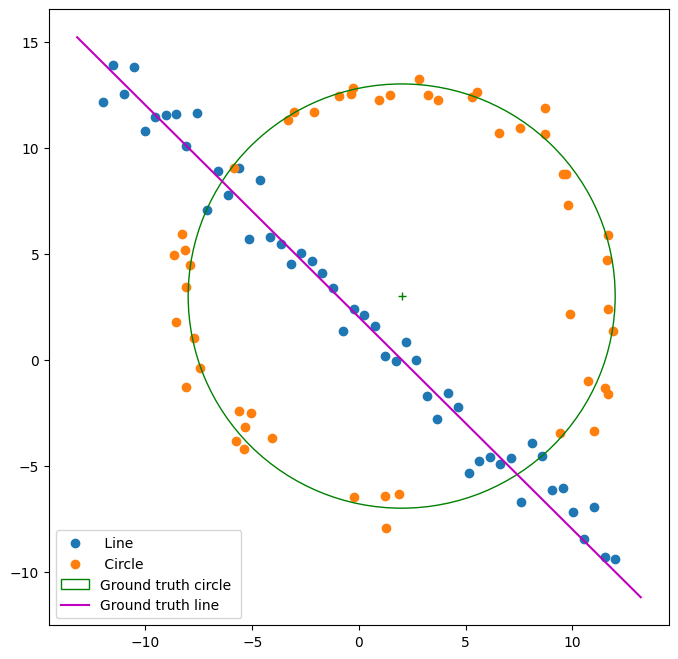

In [10]:
# Generation of a Noisy Point Set Conforming to a Line and a Ci r c l e
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
#import tikzplotlib
# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16
t = np . random. uniform(0 , 2*np . pi , half_n )
n = s*np . random. randn ( half_n )
x , y = x0_gt + ( r + n)*np . cos ( t ) , y0_gt + ( r + n)*np . sin ( t )
print(len(x))
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
s = 1.
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
print(len(x))
y = m*x + b + s*np . random. randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) ) # Al l point s
fig , ax = plt . subplots (1 ,1 , figsize =(8 ,8) )
ax .scatter ( X_line [ : , 0 ] , X_line [ : , 1 ] , label= ' Line ' )
ax .scatter ( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label= ' Circle ' )
circle_gt = plt . Circle ( ( x0_gt , y0_gt ) , r , color= 'g' , fill =False , label= 'Ground truth circle ' )
ax . add_patch ( circle_gt )
ax . plot ( ( x0_gt ) , ( y0_gt ) , '+ ' , color= 'g' )
x_min , x_max = ax . get_xlim ( )
x_ = np . array ( [ x_min , x_max ] )
y_ = m*x_ + b
plt . plot ( x_ , y_ , color= 'm' , label= 'Ground truth line ' )
plt . legend ( )

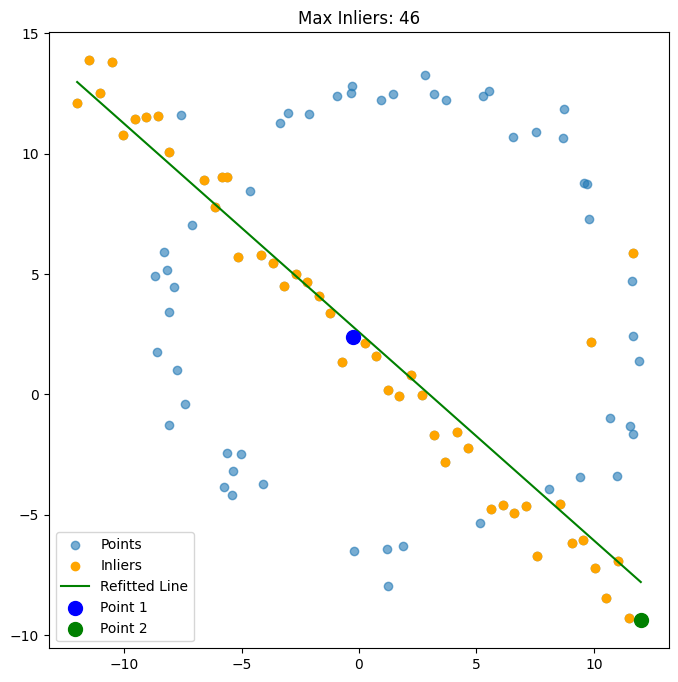

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

N = X.shape[0]  # Number of points
num_iterations = X.shape[0]  # Number of random pairs to select
max_inliers = 0
best_a, best_b, best_d = None, None, None
best_line_points = None
best_inliers_idx = None  # To store the indices of the best inliers

# Loop for random pairs of points
for _ in range(num_iterations):
    # Randomly select a pair of indices
    idx1, idx2 = np.random.choice(N, size=2, replace=False)
    point1 = X[idx1]
    point2 = X[idx2]

    # Direction vector
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]

    # Avoid division by zero if the points are too close
    if np.isclose(dx, 0) and np.isclose(dy, 0):
        continue

    # Normal vector (not yet normalized)
    a = -dy
    b = dx

    # Normalize the normal vector
    norm = np.sqrt(a**2 + b**2)
    a /= norm
    b /= norm

    # Calculate the distance from the origin to the line
    d = a * point1[0] + b * point1[1]

    # Calculate distances for all points in X
    distances = np.abs(a * X[:, 0] + b * X[:, 1] - d)

    # Set a threshold for inliers (e.g., 0.5)
    threshold = 1.2

    # Find the indices of inliers (points within the threshold distance to the line)
    inliers_idx = np.where(distances < threshold)[0]

    # Count inliers
    inliers_count = len(inliers_idx)

    # Update the best line if current has more inliers
    if inliers_count > max_inliers:
        max_inliers = inliers_count
        best_a, best_b, best_d = a, b, d
        best_line_points = (point1, point2)
        best_inliers_idx = inliers_idx

# Refit a line using only the inliers
X_inliers = X[best_inliers_idx]  # Inlier points
X_inliers_x = X_inliers[:, 0].reshape(-1, 1)
X_inliers_y = X_inliers[:, 1]

# Add best line points (already 2D arrays) to X_inliers
best_line_points_array = np.array([point1, point2])  # or simply use np.vstack([X_inliers, point1, point2])
X_inliers = np.vstack([X_inliers, best_line_points_array])

# Update X_inliers_x and X_inliers_y after adding the line points
X_inliers_x = X_inliers[:, 0].reshape(-1, 1)
X_inliers_y = X_inliers[:, 1]

# Fit a line using Linear Regression
model = LinearRegression()
model.fit(X_inliers_x, X_inliers_y)

# Get the slope and intercept of the refitted line
slope = model.coef_[0]
intercept = model.intercept_

# Generate the refitted line
x_values_refit = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values_refit = slope * x_values_refit + intercept

# Plotting the original points and the refitted line
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the original points
ax.scatter(X[:, 0], X[:, 1], label='Points', alpha=0.6)

# Plot the inliers in a different color
ax.scatter(X_inliers[:, 0], X_inliers[:, 1], color='orange', label='Inliers')

# Plot the refitted line
ax.plot(x_values_refit, y_values_refit, color='green', label='Refitted Line')

# Highlight the points that formed the original best line
ax.scatter(*best_line_points[0], color='blue', s=100, label='Point 1', zorder=5)
ax.scatter(*best_line_points[1], color='green', s=100, label='Point 2', zorder=5)

# Labels and legend
ax.set_title(f'Max Inliers: {max_inliers}')
ax.legend()
plt.show()


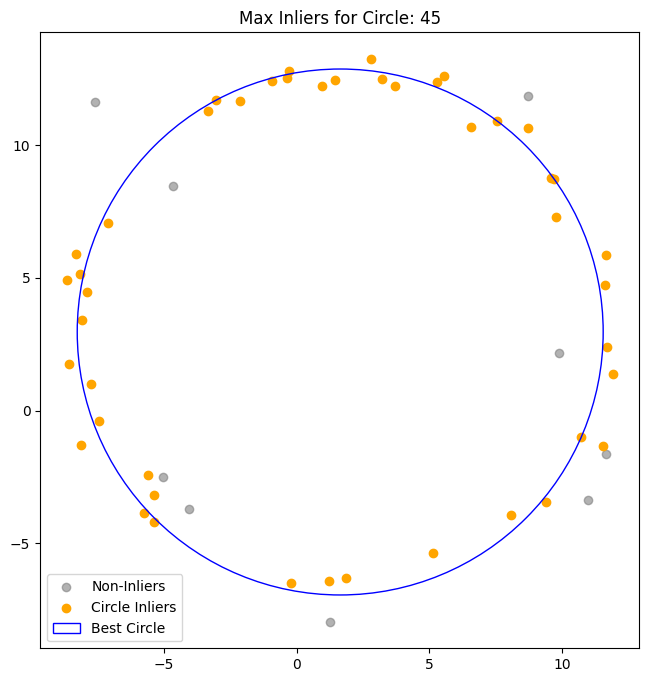

In [12]:
# Subtract inliers from original dataset to get the remaining points
X_remaining = np.delete(X, best_inliers_idx, axis=0)

def circle_from_three_points(p1, p2, p3):
    """
    Calculate the center and radius of a circle passing through three points.
    """
    A = np.array([[p1[0], p1[1], 1],
                  [p2[0], p2[1], 1],
                  [p3[0], p3[1], 1]])

    B = np.array([- (p1[0]**2 + p1[1]**2),
                  - (p2[0]**2 + p2[1]**2),
                  - (p3[0]**2 + p3[1]**2)])

    # Solve for the center (xc, yc) and radius r
    try:
        a, b, c = np.linalg.solve(A, B)
    except np.linalg.LinAlgError:
        return None, None

    xc = -0.5 * a
    yc = -0.5 * b
    r = np.sqrt(xc**2 + yc**2 - c)

    return np.array([xc, yc]), r

# Set parameters
num_iterations = 100
threshold = 1
max_inliers_circle = 0
best_circle_center = None
best_circle_radius = None
best_inliers_idx_circle = None

# Loop for random triplets of points from remaining data
for _ in range(num_iterations):
    # Randomly select 3 indices from the remaining points
    indices = np.random.choice(X_remaining.shape[0], size=3, replace=False)
    p1, p2, p3 = X_remaining[indices]

    # Compute the circle from the 3 points
    center, radius = circle_from_three_points(p1, p2, p3)

    if center is None or radius is None:
        continue

    # Compute the distances of all points to the circle center
    distances_to_center = np.linalg.norm(X_remaining[:, :2] - center, axis=1)

    # Calculate radial distances (difference between distance to center and radius)
    radial_distances = np.abs(distances_to_center - radius)

    # Count the inliers (points within the threshold distance to the circle)
    inliers_idx_circle = np.where(radial_distances < threshold)[0]
    inliers_count_circle = len(inliers_idx_circle)

    # Update the best circle if current one has more inliers
    if inliers_count_circle > max_inliers_circle:
        max_inliers_circle = inliers_count_circle
        best_circle_center = center
        best_circle_radius = radius
        best_inliers_idx_circle = inliers_idx_circle
        best_points =  p1, p2, p3

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the remaining points (non-inliers) in a different color
remaining_idx = np.setdiff1d(np.arange(X_remaining.shape[0]), best_inliers_idx_circle)
X_non_inliers = X_remaining[remaining_idx]
ax.scatter(X_non_inliers[:, 0], X_non_inliers[:, 1], label='Non-Inliers', color='gray', alpha=0.6)

# Plot the inliers in a different color
X_circle_inliers = X_remaining[best_inliers_idx_circle]
ax.scatter(X_circle_inliers[:, 0], X_circle_inliers[:, 1], label='Circle Inliers', color='orange')

# Plot the best circle
if best_circle_center is not None and best_circle_radius is not None:
    circle = plt.Circle(best_circle_center, best_circle_radius, color='blue', fill=False, label='Best Circle')
    ax.add_patch(circle)

# Labels and legend
ax.set_title(f'Max Inliers for Circle: {max_inliers_circle}')
ax.legend()
plt.xlim(np.min(X_remaining[:, 0]) - 1, np.max(X_remaining[:, 0]) + 1)
plt.ylim(np.min(X_remaining[:, 1]) - 1, np.max(X_remaining[:, 1]) + 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


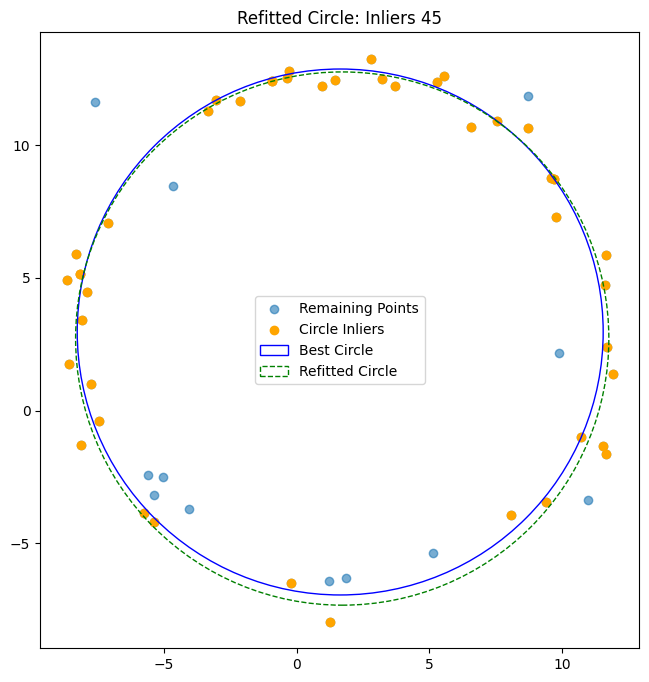

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to calculate the distance of a point from a circle
def circle_distance(params, points):
    """
    Calculate the sum of squared distances between the points and the circle.
    params: [xc, yc, r], where (xc, yc) is the circle center and r is the radius
    points: array of shape (n_points, 2) where each row is (x, y)
    """
    xc, yc, r = params
    distances = np.sqrt((points[:, 0] - xc) ** 2 + (points[:, 1] - yc) ** 2)
    return np.sum((distances - r) ** 2)  # Sum of squared differences

# Assume we already have best_circle_center and best_circle_radius
# Initial guess for the circle parameters
initial_guess = [best_circle_center[0], best_circle_center[1], best_circle_radius]

# Inlier points (these are the points that are close to the initial circle)
# Concatenate p1, p2, p3 with the inliers
X_inliers_circle = np.vstack((X_remaining[inliers_idx_circle, :], p1, p2, p3))

 # The inliers for the best circle

# Minimize the sum of squared distances between the inliers and the circle
result = minimize(circle_distance, initial_guess, args=(X_inliers_circle,), method='BFGS')

# Get the optimized circle parameters
optimized_xc, optimized_yc, optimized_r = result.x

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the remaining points
ax.scatter(X_remaining[:, 0], X_remaining[:, 1], label='Remaining Points', alpha=0.6)

# Plot the inliers for the best circle
ax.scatter(X_inliers_circle[:, 0], X_inliers_circle[:, 1], color='orange', label='Circle Inliers')

# Plot the original best circle
circle_original = plt.Circle(best_circle_center, best_circle_radius, color='blue', fill=False, label='Best Circle')

# Plot the refitted (optimized) circle
circle_optimized = plt.Circle((optimized_xc, optimized_yc), optimized_r, color='green', fill=False, linestyle='--', label='Refitted Circle')

# Add both circles to the plot
ax.add_patch(circle_original)
ax.add_patch(circle_optimized)

# Labels and legend
ax.set_title(f'Refitted Circle: Inliers {max_inliers_circle}')
ax.legend()
plt.xlim(np.min(X_remaining[:, 0]) - 1, np.max(X_remaining[:, 0]) + 1)
plt.ylim(np.min(X_remaining[:, 1]) - 1, np.max(X_remaining[:, 1]) + 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


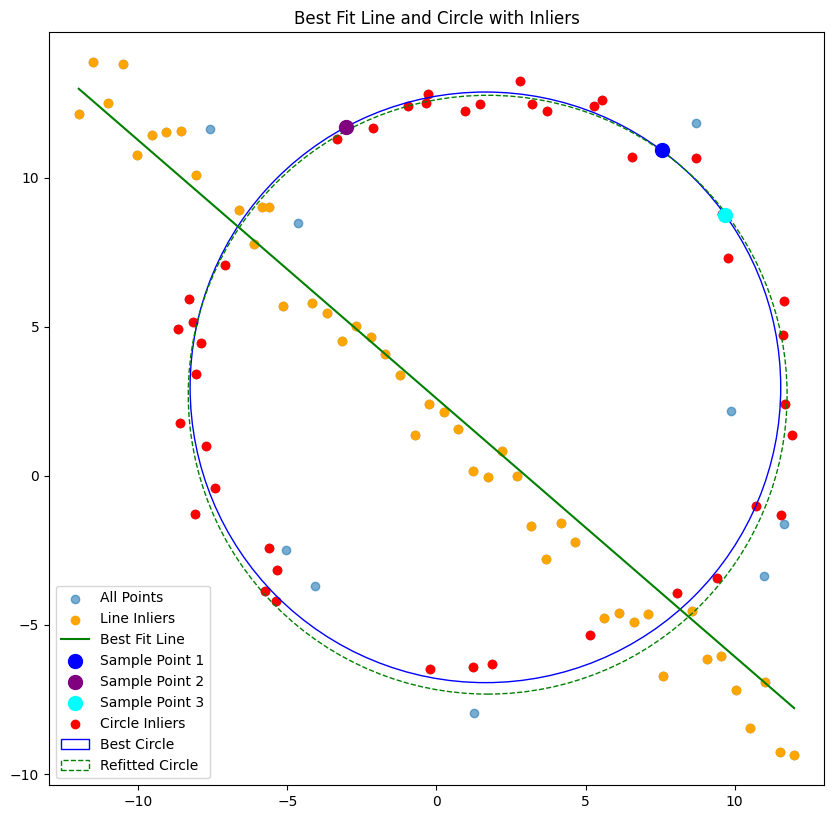

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

# Function to calculate the distance of a point from a circle
def circle_distance(params, points):
    xc, yc, r = params
    distances = np.sqrt((points[:, 0] - xc) ** 2 + (points[:, 1] - yc) ** 2)
    return np.sum((distances - r) ** 2)

# Function to calculate the circle from three points
def circle_from_three_points(p1, p2, p3):
    A = np.array([[p1[0], p1[1], 1],
                  [p2[0], p2[1], 1],
                  [p3[0], p3[1], 1]])
    B = np.array([- (p1[0]**2 + p1[1]**2),
                  - (p2[0]**2 + p2[1]**2),
                  - (p3[0]**2 + p3[1]**2)])
    try:
        a, b, c = np.linalg.solve(A, B)
    except np.linalg.LinAlgError:
        return None, None
    xc = -0.5 * a
    yc = -0.5 * b
    r = np.sqrt(xc**2 + yc**2 - c)
    return np.array([xc, yc]), r

# Assuming X, best_line_points, and best_circle parameters are defined from your previous code
# X: All points, best_line_points: (p1, p2) for the best line
# best_circle_center, best_circle_radius are the results of the circle fitting

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot all points
ax.scatter(X[:, 0], X[:, 1], label='All Points', alpha=0.6)

# Plot inliers for the best-fit line
X_inliers_line = X[best_inliers_idx]
ax.scatter(X_inliers_line[:, 0], X_inliers_line[:, 1], color='orange', label='Line Inliers')

# Plot the best fit line
x_values_refit = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values_refit = model.coef_[0] * x_values_refit + model.intercept_
ax.plot(x_values_refit, y_values_refit, color='green', label='Best Fit Line')

# Plot the sampled points for the circle
ax.scatter(*best_points[0], color='blue', s=100, label='Sample Point 1', zorder=5)
ax.scatter(*best_points[1], color='purple', s=100, label='Sample Point 2', zorder=5)
ax.scatter(*best_points[2], color='cyan', s=100, label='Sample Point 3', zorder=5)

# Plot inliers for the best-fit circle
X_circle_inliers = X_remaining[best_inliers_idx_circle]
ax.scatter(X_circle_inliers[:, 0], X_circle_inliers[:, 1], color='red', label='Circle Inliers')

# Plot the original best circle
circle_original = plt.Circle(best_circle_center, best_circle_radius, color='blue', fill=False, label='Best Circle')
ax.add_patch(circle_original)

# Optimize and plot the refitted circle
initial_guess = [best_circle_center[0], best_circle_center[1], best_circle_radius]
result = minimize(circle_distance, initial_guess, args=(X_inliers_circle,), method='BFGS')
optimized_xc, optimized_yc, optimized_r = result.x
circle_optimized = plt.Circle((optimized_xc, optimized_yc), optimized_r, color='green', fill=False, linestyle='--', label='Refitted Circle')
ax.add_patch(circle_optimized)

# Set aspect ratio and labels
ax.set_title(f'Best Fit Line and Circle with Inliers')
ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
plt.gca().set_aspect('equal', adjustable='box')
ax.legend()
plt.show()


# Question 3

In [88]:
import cv2 as cv
import numpy as np

# Initialize lists to store selected points
selected_points = []



def overlay_image(img1, img2):
    # Load the original and overlay (flag) images
    original_image = img1
    overlay_image = img2

    # Create a copy of the original image for drawing points
    original_image_copy = original_image.copy()
    # Mouse callback function to get points on click
    def select_point(event, x, y, flags, param):
        if event == cv.EVENT_LBUTTONDOWN and len(selected_points) < 4:
            selected_points.append((x, y))
            print(f"Point selected: {x, y}")
            # Draw a green circle on the selected point
            cv.circle(original_image_copy, (x, y), 5, (0, 255, 0), -1)  # Green circle
            cv.imshow("Select 4 points on the architectural image", original_image_copy)
    # Show the original image and set the mouse callback function

    # Show the original image and set the mouse callback function
    cv.imshow("Original Image with Selected Points", original_image_copy)
    cv.setMouseCallback("Original Image with Selected Points", select_point)

    # Wait until 4 points are selected
    while len(selected_points) < 4:
        cv.waitKey(1)

    cv.destroyAllWindows()  # Close the image window after selecting points

    # Convert selected points to a NumPy array of type float32
    dest_points = np.array(selected_points).astype(np.float32)

    # Get the dimensions of the overlay image (flag)
    height, width = overlay_image.shape[:2]

    # Define the four corners of the overlay (source points)
    src_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

    # Compute the homography matrix
    transformation_matrix = cv.getPerspectiveTransform(src_points, dest_points)

    # Warp the overlay image (flag) to fit the selected points
    transformed_image = cv.warpPerspective(overlay_image, transformation_matrix, (original_image.shape[1], original_image.shape[0]))

    # Blend the warped image with the original image
    blend_opacity = 0.5 # Adjust this value for different blending effects
    final_image = cv.addWeighted(original_image, 1, transformed_image, blend_opacity, 0.7)

    final_image = cv.cvtColor(final_image, cv.COLOR_BGR2RGB)
    original_image_copy = cv.cvtColor(original_image_copy, cv.COLOR_BGR2RGB)
    
    # Create a figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    # Plot the original image with selected points in the first subplot
    ax[0].imshow(original_image_copy)
    ax[0].axis('off')  # Turn off axis labels
    ax[0].set_title("Selected points on the Original Image")

    # Plot the blended final image in the second subplot
    ax[1].imshow(final_image)
    ax[1].axis('off')  # Turn off axis labels
    ax[1].set_title("Overlay Image")

    # Display the figure
    plt.show()
        
  
 



Point selected: (214, 301)
Point selected: (466, 396)
Point selected: (205, 535)
Point selected: (466, 544)


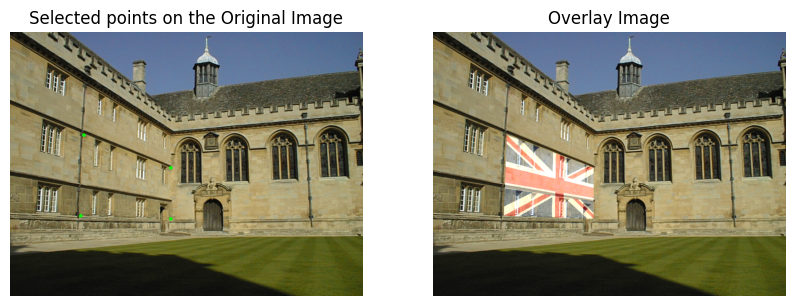

In [86]:
img1 = cv.imread('005.jpg')   
img2 = cv.imread('flag.png')
overlay_image(img1,img2)

Point selected: (479, 374)
Point selected: (1090, 318)
Point selected: (481, 680)
Point selected: (1099, 697)


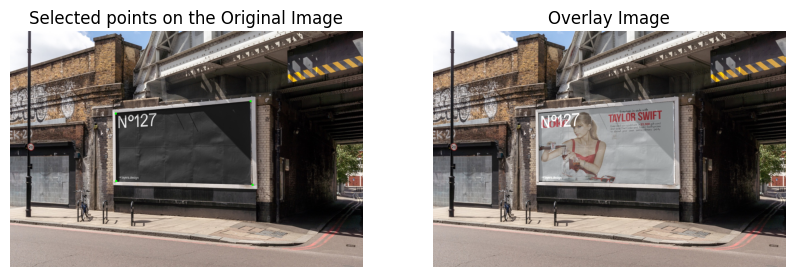

In [89]:
img3 = cv.imread('addwall.jpg')
img4 = cv.imread('taylor.jpg')
overlay_image(img3, img4)

# Question 4

In [90]:
from skimage import transform
def SIFT_features(img1, img5, plot = False):
    # Feature matching with SIFT
    img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
    img5_gray = cv.cvtColor(img5, cv.COLOR_RGB2GRAY)

    # Identify key points of each image
    sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = 0.09, edgeThreshold = 25, sigma = 1) 

    keypoints1, descriptors1 = sift.detectAndCompute(img1_gray, None)
    keypoints5, descriptors5 = sift.detectAndCompute(img5_gray, None)

    bf = cv.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors5, k=2)  # Find k best matches
    # Apply ratio test
    good_matches = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good_matches.append(m)

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        img1_features = cv.drawKeypoints(img1_gray, keypoints1, img1_gray)
        plt.imshow(img1_features)
        plt.title("Image 1 SIFT features")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        img5_features = cv.drawKeypoints(img5_gray, keypoints5, img5_gray)
        plt.imshow(img5_features)
        plt.title("Image 5 SIFT features")
        plt.axis('off')
        plt.tight_layout()

        plt.figure()
        matched_img = cv.drawMatches(img1_gray, keypoints1, img5_gray, keypoints5, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.imshow(matched_img)
        plt.title("Matched features between image 1 and 5")
        plt.axis('off')

    return good_matches, keypoints1, keypoints5

In [91]:
def get_inliers(src_full, dst_full, tform, thres):
    dst_check = tform(src_full)
    errors = np.sqrt(np.sum(np.square(dst_check - dst_full), axis = 1))

    return np.where(errors < thres)[0]

In [92]:
def find_best_homography(good_matches, keypoints1, keypoints5):
    # Array of all the matching points
    src_full = []
    dst_full = []

    for match in good_matches:
        src_full.append(np.array(keypoints1[match.queryIdx].pt))
        dst_full.append(np.array(keypoints5[match.trainIdx].pt))

    src_full = np.array(src_full)
    dst_full = np.array(dst_full)

    # RANSAC for finding best homography
    num_points = 4
    thres = 1
    d = 0.5 * len(good_matches)
    iters = 200

    best_homography = None
    best_inlier_count = 0
    best_inliers = None

    for i in range(iters):
        chosen_matches = np.random.choice(good_matches, num_points, replace = False)

        src_points = []
        dst_points = []
        for match in chosen_matches:
            src_points.append(np.array(keypoints1[match.queryIdx].pt))
            dst_points.append(np.array(keypoints5[match.trainIdx].pt))

        src_points = np.array(src_points)
        dst_points = np.array(dst_points)

        tform = transform.estimate_transform('projective', src_points, dst_points)
        inliers = get_inliers(src_full, dst_full, tform, thres)
        #print(f'Iteration {i}: No. of inliers = {len(inliers)}')

        if len(inliers) > best_inlier_count:
            best_inlier_count = len(inliers)
            best_homography = tform
            best_inliers = inliers

    print(f'Best no. of inliers = {best_inlier_count}')
    return best_homography, best_inliers

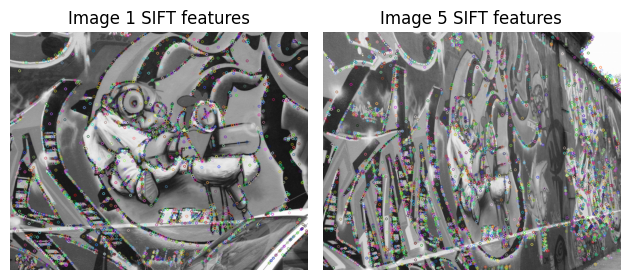

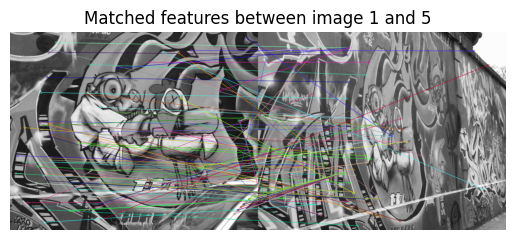

In [93]:
img1 = cv.imread("img1.ppm")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img5 = cv.imread("img5.ppm")
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

features = SIFT_features(img1, img5, plot = True)

Best no. of inliers = 734
Best no. of inliers = 544
Best no. of inliers = 695
Best no. of inliers = 493


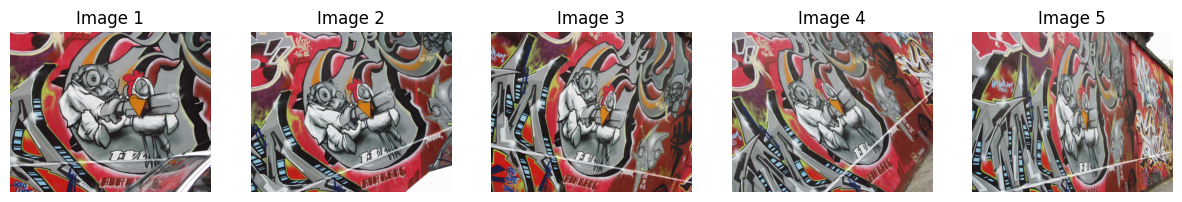

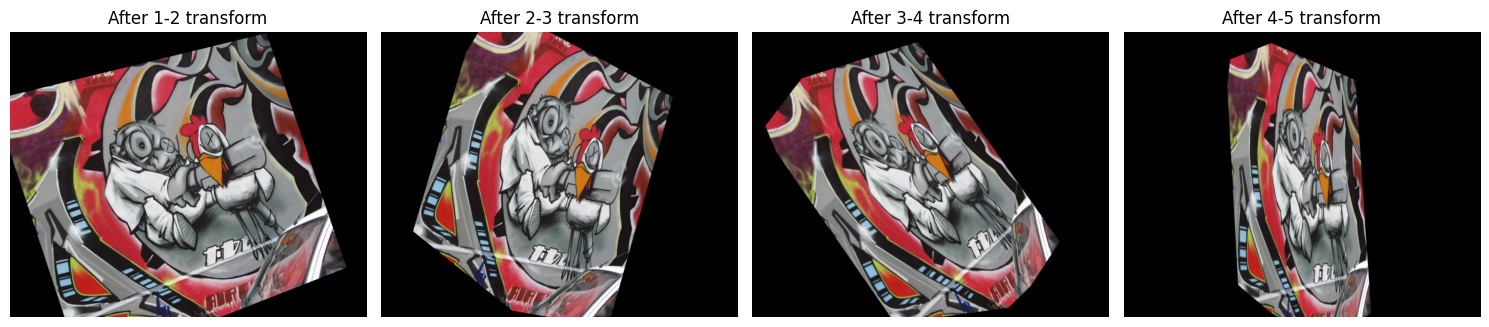

In [97]:
np.random.seed(62)
pad = 100

images = []
plt.figure(figsize = (15, 10))
for i in range(1, 6):
    img = cv.imread(f"img{i}.ppm")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    images.append(img)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(f"Image {i}")
    plt.axis('off')

final_transform = transform.ProjectiveTransform(np.identity(3))

plt.figure(figsize = (15, 10))
for i in range(1, 5):
    img1, img2 = images[i-1], images[i]
    good_matches, keypoints1, keypoints5 = SIFT_features(img1, img2)
    tform, _ = find_best_homography(good_matches, keypoints1, keypoints5)
    final_transformed_image = transform.warp(final_transformed_image, tform.inverse)
    final_transform = final_transform + tform
    plt.subplot(1, 4, i)
    plt.imshow(final_transformed_image)
    plt.title(f"After {i}-{i+1} transform")
    plt.axis('off')
plt.tight_layout()
final_transformed_image = transform.warp(images[0], final_transform.inverse)

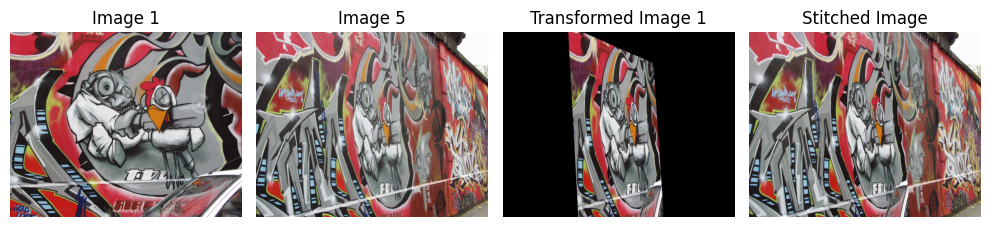

In [98]:

final_transformed_image = transform.warp(images[0], final_transform.inverse)
final_transformed_image = (final_transformed_image * 255).astype(np.uint8)
mask = (final_transformed_image == 0)
stitched_image = mask * images[4] + final_transformed_image

plt.figure(figsize = (10, 10))

plt.subplot(1, 4, 1)
plt.imshow(images[0])
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(images[4])
plt.title("Image 5")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(final_transformed_image)
plt.title("Transformed Image 1")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(stitched_image)
plt.title("Stitched Image")
plt.axis('off')
plt.tight_layout()